### Finding latent variables in data - Exercises & Answers

### 1. Grit - what is it?
The 'grit' factor is a concept from psychology research made mainstream by the popular science book of the same name, by the author and researcher Professor Angela Duckworth. Those high on the 'grit' factor have greater success in life, as they are able to persevere in the face of adversity to achieve their goals. Grit is thought of as a dimension of personality, or individual differences.

This is all well and good, but many researchers criticise the idea of 'grit' being an aspect of personality - rather, they claim it is simply an aspect of the trait Conscientiousness, which is indeed all about peoples tendency to persevere.

One way we can identify the 'uniqueness' of grit is by conducting a factor analysis of its individual questions along with questions measuring the Big Five. If everyone completes both of these questionnaires, then we have the perfect dataset to test this question.

That dataset exists! Download the data from this link: https://openpsychometrics.org/_rawdata/duckworth-grit-scale-data.zip

You will need to unzip it and grab the `data.csv` file.

Import everything we need first, including `FactorAnalyzer` and `parallel_analysis`.


In [1]:
# Your answer here
# Import what we need
import pandas as pd # dataframes
import seaborn as sns # plots
import statsmodels.formula.api as smf # Models
import marginaleffects as me # marginal effects
import numpy as np # numpy for some functions
import pingouin as pg
from factor_analyzer import FactorAnalyzer # Note we write from factor_analyzer
from horns import parallel_analysis

Then read in the data into a dataframe called `grit`, specifying the separator as '\t' (sep='\t').

In [2]:
# Your answer here
# Read in
grit = pd.read_csv('data.csv', sep='\t')
grit.head(10)

,country,surveyelapse,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,...,O7,O8,O9,O10,operatingsystem,browser,screenw,screenh,introelapse,testelapse
0,RO,174,1,1,3,3,3,2,3,1,...,5,4,5,4,Windows,Chrome,1366,768,69590,307
1,US,120,2,2,3,3,2,1,3,3,...,4,3,4,5,Macintosh,Chrome,1280,800,33657,134
2,US,99,3,3,3,3,4,3,4,4,...,5,5,4,4,Windows,Firefox,1920,1080,95550,138
3,KE,5098,1,3,4,2,4,1,5,4,...,4,2,5,4,Windows,Chrome,1600,900,4,4440
4,JP,340,1,2,3,3,2,2,2,4,...,4,1,3,2,Windows,Firefox,1920,1080,3,337
5,AU,515,1,2,5,1,3,1,4,5,...,5,2,5,5,Windows,Chrome,1920,1080,2090,554
6,US,126,2,1,3,4,1,1,1,1,...,5,5,5,5,Windows,Chrome,1366,768,36,212
7,RO,208,3,1,1,4,1,3,4,4,...,5,3,4,3,Windows,Chrome,1366,768,6,207
8,EU,130,1,3,3,1,4,1,5,4,...,5,1,4,5,Windows,Microsoft Internet Explorer,1600,1000,14,183
9,NZ,129,2,3,2,2,4,2,4,4,...,4,3,4,4,Macintosh,Chrome,1440,900,68,143


There's a lot of extra variables we don't need. Make a new dataframe called `grit2`, by running the following command - this is a quick way to select the columns that correspond to the personality items we need (I am trying to save you a lot of typing!):

In [3]:
# Get what is needed
grit2 = grit.filter(regex='[GSENACO]+\d+')
grit2.head()

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,1,3,3,3,2,3,1,3,2,...,5,2,4,1,4,2,5,4,5,4
1,2,2,3,3,2,1,3,3,2,1,...,4,2,5,2,4,1,4,3,4,5
2,3,3,3,3,4,3,4,4,3,3,...,4,2,4,2,4,3,5,5,4,4
3,1,3,4,2,4,1,5,4,1,1,...,5,2,3,2,4,1,4,2,5,4
4,1,2,3,3,2,2,2,4,3,3,...,5,3,2,2,3,3,4,1,3,2


This is now suitable to work with. First, let us examine the psychometric properties of the grit scale in and of itself.

Below, select out the 12 grit scale items into its own dataframe (e.g., `grit_only`). 
Then, conduct an EFA with *two* factors to see how well the questions load onto it. Plot it as a heatmap. Why 2 factors? This is the number that Duckworth et al suggest the scale has, tapping *persistence of interest* and *perseverance of effort*.

If you are interested, you can see what questions the codes represent here (e.g. what GS1, GS2 means): https://mcnairscholars.com/wp-content/uploads/2015/02/12-item-Grit-Scale-Angela-Duckworth.pdf

Does it appear that all questions in the grit scale load onto two factors?

<Axes: >

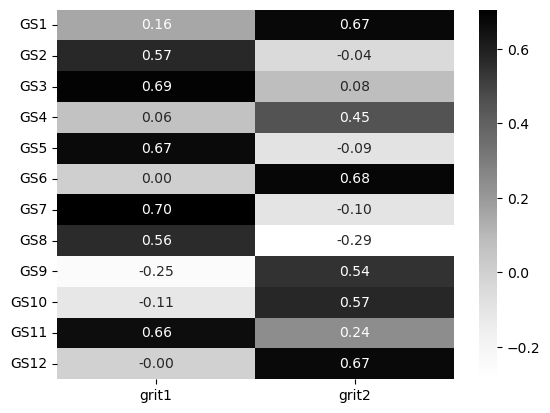

In [4]:
# Your answer here
# Select out grit
grit_only = grit2[['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12']]

# A single factor EFA
grit_efa = FactorAnalyzer(n_factors=2).fit(grit_only)

# Get loadings
grit_loadings = pd.DataFrame(grit_efa.loadings_, index=grit_only.columns, columns=['grit1', 'grit2'])

# Heatmap
sns.heatmap(grit_loadings, annot=True, fmt='.2f', cmap='Greys')

This appears to be the case. There's a clear separation here and the two factors appear to emerge, much like in the original publication.

Now, onto the bigger question. To what extent are these grit-factors distinct from Conscientiousness? One way to test this is to use EFA to determine how many factors underpin responses to Conscientiousness *and* the grit scale at the same time. If they are distinct components, we should see separate latent variables emerge to capture them. Lets do this - extract the grit questions (e.g. GS1-GS12) and the Conscientiousness questions (C1-C10) into a single dataframe first:

In [5]:
# Your answer here
# Get grit and conscientiousness
grit_consc_names = ['GS1', 'GS2', 'GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12',
                    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']

# Extract them
grit_consc = grit2[grit_consc_names]
grit_consc.head(10) 
              

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1,1,3,3,3,2,3,1,3,2,...,2,4,4,3,2,4,3,2,2,4
1,2,2,3,3,2,1,3,3,2,1,...,4,3,4,3,1,3,5,2,5,3
2,3,3,3,3,4,3,4,4,3,3,...,2,2,4,2,3,4,5,3,3,4
3,1,3,4,2,4,1,5,4,1,1,...,4,1,5,1,4,1,4,1,4,3
4,1,2,3,3,2,2,2,4,3,3,...,3,1,3,1,4,2,3,2,3,4
5,1,2,5,1,3,1,4,5,2,3,...,5,3,4,1,4,3,4,1,4,5
6,2,1,3,4,1,1,1,1,4,1,...,2,4,5,3,2,1,4,3,4,4
7,3,1,1,4,1,3,4,4,3,3,...,4,1,5,3,3,1,5,3,5,4
8,1,3,3,1,4,1,5,4,2,1,...,4,3,4,1,3,1,3,1,4,4
9,2,3,2,2,4,2,4,4,2,3,...,4,3,4,3,2,3,4,2,3,4


We could approach this by extracting a single factor, two, three, etc, and checking the loadings. Instead, we'll use parallel analysis here to determine the number of factors. Do this below, setting simulations to 500 to ensure it finishes reasonably swiftly.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

6


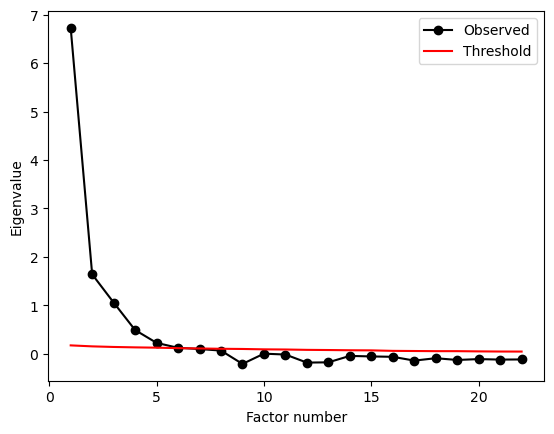

In [6]:
# Your answer here
grit_consc_parallel = parallel_analysis(grit_consc.to_numpy(), simulations=500, analysis_type='fa', full_output=True)

# Print number of factors
print(grit_consc_parallel['factors'])

Parallel analysis suggests SIX(!) factors! In that case, fit an EFA, create the loadings matrix, and use `seaborn` to make a heatmap of them.

<Axes: >

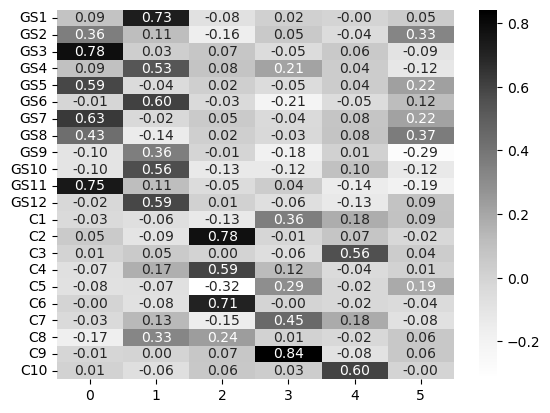

In [7]:
# Your answer here
# fit model
efa_6 = FactorAnalyzer(n_factors=6).fit(grit_consc)

# Extract loadings
efa_6_loadings = pd.DataFrame(efa_6.loadings_, index=grit_consc.columns)

# Visualise
sns.heatmap(efa_6_loadings, annot=True, fmt='.2f', cmap='Greys')

What is interesting here is that the grit scale emerges as two factors in its own right, but the Conscientiousness factor is diluted across around four factors - though some are indeed rather poor. We can check the communalities for more information:

In [8]:
# Your answer here
# get communalities
efa_6.get_communalities()

array([0.54301249, 0.28436809, 0.63299058, 0.36138483, 0.3993016 ,
       0.42713604, 0.45891183, 0.34347377, 0.25445919, 0.38493826,
       0.63124181, 0.371517  , 0.19125906, 0.6211762 , 0.31804021,
       0.40373643, 0.23457326, 0.5091881 , 0.28339791, 0.19473899,
       0.72426748, 0.36885508])

Most of these are not particularly strong. What about the proportion of variance explained by each factor?

In [9]:
# Your answer here
efa_6.get_factor_variance()

(array([2.30893142, 2.19415419, 1.73302355, 1.30210127, 0.82039219,
        0.5833656 ]),
 array([0.10495143, 0.09973428, 0.0787738 , 0.05918642, 0.03729055,
        0.02651662]),
 array([0.10495143, 0.20468571, 0.28345951, 0.34264593, 0.37993648,
        0.4064531 ]))

The center row shows that these factors alone don't explain much variance each, and together they get around 40% of the variance in the data. One final suggestion would be to consider the grit scales against the backdrop of all the other traits in the Big 5. Perhaps not just Conscientiousness plays a role. So, the next challenge is to fit an EFA to *all the trait data* - grit, Conscientiousness, and the rest of the traits! You can access that in the `grit2` dataframe already. Use parallel analysis to see how many factors emerge from this. Try setting simulations to 100 to get this to work faster.

/opt/miniconda3/envs/py11/lib/python3.11/site-packages/scipy/stats/_multivariate.py:931: RuntimeWarning: divide by zero encountered in log
/opt/miniconda3/envs/py11/lib/python3.11/site-packages/horns/__init__.py:361: RuntimeWarning: invalid value encountered in multiply
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated,

18


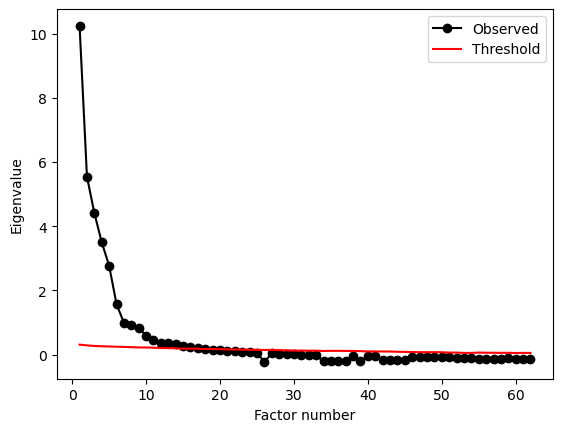

In [10]:
# Your answer here
all_factors = parallel_analysis(grit2.to_numpy(), simulations=100, analysis_type='fa', full_output=True)

# print number of factors
print(all_factors['factors'])

This suggests *eighteen* factors, and is a good example of why you should not always trust blindly in approaches like parallel analysis!

As a final step, build a 5-factor model with EFA and examine the loadings, showing them in an annotated heatmap.

<Axes: >

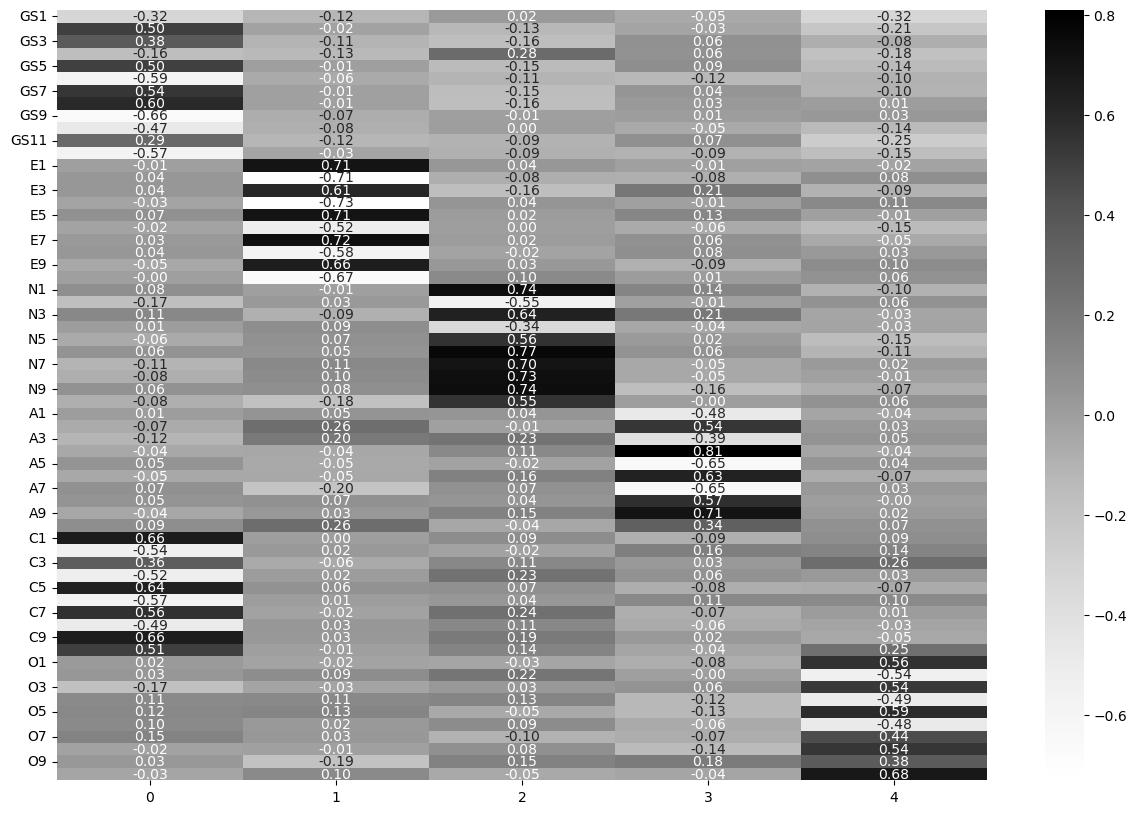

In [11]:
# Your answer here
all_data_efa = FactorAnalyzer(n_factors=5).fit(grit2)

# Loadings
all_loadings = pd.DataFrame(all_data_efa.loadings_,
                           index=grit2.columns)

# Heatmap
import matplotlib.pyplot as plt # this code
plt.figure(figsize=(15, 10)) # and this - makes plot bigger
sns.heatmap(all_loadings, cmap='Greys', annot=True, fmt='.2f')

Finally, this is what the criticisms were about. It is interesting to note that when considered against the backdrop of the other traits, Conscientiousness and grit appear on the same factor, but not when considered in isolation. The parallel analysis results also suggest there may be more to this story; and also highlights the theme we have touched on throughout these examples - there are trade offs to building models, and no-one way is correct - both theory and data have to join to build a good model.

### 2. The Nerdiness Scale - how many factors determine nerd status?
Researchers in personality use EFA and psychometrics to measure other interesting kinds of individual differences. In the following example, we'll take a look at the development of a 'nerdiness' scale, examine its properties, and see how well the models predictions (i.e. scores on a factor) correlate with someones self-reported nerdiness. 

Download the dataset from the following location: http://openpsychometrics.org/_rawdata/NPAS-data-16December2018.zip

Read in the dataset from that folder, called `data.csv`, using a tab-separated delimeter. I've renamed it below just for organisation purposes.

In [12]:
# Your answer here
# Read in nerdiness with tab
nerd = pd.read_csv('data_nerd.csv', sep='\t')
nerd.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,race_arab,race_asian,race_black,race_white,race_hispanic,race_nativeam,race_nativeau,race_other,nerdy,ASD
0,3,5,3,3,5,5,5,3,5,5,...,0,0,0,1,0,0,0,0,7,2
1,4,4,4,3,5,2,5,1,4,4,...,0,0,0,1,0,0,0,0,6,2
2,5,5,5,5,5,5,5,5,5,5,...,0,0,0,1,0,0,0,0,7,2
3,5,5,5,5,5,5,5,3,5,5,...,0,0,0,1,0,0,0,0,7,2
4,4,4,4,4,4,4,4,4,4,5,...,0,0,0,1,0,0,0,0,6,2


Run the following code to subset the data, which selects only the nerd columns (Q1-Q26) and the self-reported nerdiness column.

In [13]:
# Run to save typing
nerd_only = nerd.filter(regex='^Q\d+|nerdy')
nerd_only.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,nerdy
0,3,5,3,3,5,5,5,3,5,5,...,5,5,5,5,5,5,5,5,5,7
1,4,4,4,3,5,2,5,1,4,4,...,3,1,3,3,3,4,4,4,5,6
2,5,5,5,5,5,5,5,5,5,5,...,4,5,5,5,5,5,5,3,5,7
3,5,5,5,5,5,5,5,3,5,5,...,5,5,5,4,1,5,5,5,5,7
4,4,4,4,4,4,4,4,4,4,5,...,5,3,5,5,4,4,5,4,0,6


The questions are as follows:

- Q1	I am interested in science.
- Q2	I was in advanced classes.
- Q3	I like to play RPGs. (Ex. D&D)
- Q4	My appearance is not as important as my intelligence.
- Q5	I collect books.
- Q6	I prefer academic success to social success.
- Q7	I watch science related shows.
- Q8	I spend recreational time researching topics others might find dry or overly rigorous.
- Q9	I like science fiction.
- Q10	I would rather read a book than go to a party.
- Q11	I am more comfortable with my hobbies than I am with other people.		
- Q12	I spend more time at the library than any other public place.
- Q13	I would describe my smarts as bookish.
- Q14	I like to read technology news reports.
- Q15	I have started writing a novel.
- Q16	I gravitate towards introspection.
- Q17	I am more comfortable interacting online than in person.
- Q18	I love to read challenging material.
- Q19	I have played a lot of video games.
- Q20	I was a very odd child.
- Q21	I sometimes prefer fictional people to real ones.
- Q22	I enjoy learning more than I need to.
- Q23	I get excited about my ideas and research.
- Q24	I am a strange person.
- Q25	I care about super heroes.
- Q26	I can be socially awkward at times.

From this, drop the 'nerdy' column, and do a parallel analysis on the remaining columns to see what the dimensional structure of the questionnaire might be.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested

9


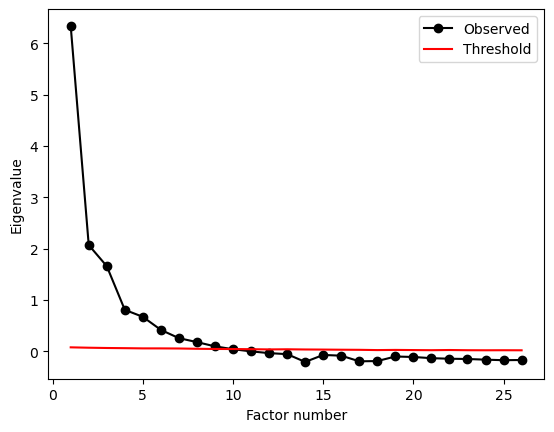

In [14]:
# Your answer here
no_nerdy = nerd_only.drop(columns='nerdy')

# Parallel
nerd_pa = parallel_analysis(no_nerdy.to_numpy(), simulations=100, analysis_type='fa', full_output=True)

# Print results
print(nerd_pa['factors'])

This suggests 9 factors. Let's explore what those might look like, though this is probably too much! Fit an EFA of 9 factors, extract the loadings, and show the heatmap.

<Axes: >

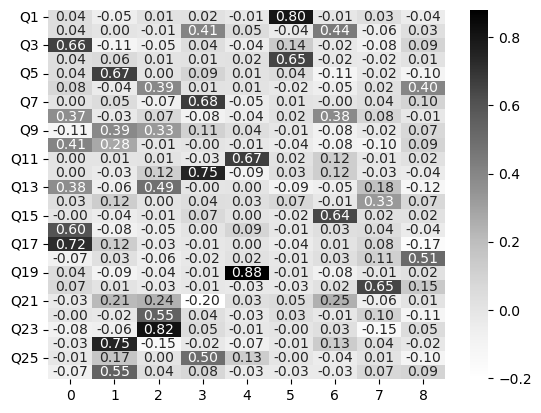

In [15]:
# Your answer here
nerd_efa_9 = FactorAnalyzer(n_factors=9).fit(no_nerdy)

# Loadings
nerd_efa_9_loadings = pd.DataFrame(nerd_efa_9.loadings_, 
                                   index=no_nerdy.columns)

# Show
sns.heatmap(nerd_efa_9_loadings, cmap='Greys', annot=True, fmt='.2f')

This shows parallel analysis has found a series of factors that have few high loadings - e.g., it is quite a sparse output. Lets see what the variance explained looks like:

In [16]:
# Your answer here
nerd_efa_9.get_factor_variance()

(array([1.80913475, 1.68391653, 1.57982306, 1.5178765 , 1.2784141 ,
        1.11135939, 0.90480629, 0.65422835, 0.57337248]),
 array([0.06958211, 0.06476602, 0.06076243, 0.05837987, 0.04916977,
        0.04274459, 0.03480024, 0.02516263, 0.02205279]),
 array([0.06958211, 0.13434813, 0.19511055, 0.25349042, 0.30266019,
        0.34540478, 0.38020502, 0.40536765, 0.42742044]))

Each contributes a small amount, which suggests this isn't that good of a solution. Let's see what the communalities look like:

In [17]:
# Your answer here
nerd_efa_9.get_communalities()

array([0.65057301, 0.37629346, 0.4854228 , 0.4292649 , 0.47732474,
       0.32642961, 0.47671123, 0.30240136, 0.29431115, 0.27203165,
       0.46464797, 0.59778914, 0.4400656 , 0.13828528, 0.41991108,
       0.38072231, 0.57348669, 0.28334579, 0.79627027, 0.44664745,
       0.21578513, 0.32416882, 0.70342826, 0.60850485, 0.30315238,
       0.32595654])

These are all fairly middling, with the occasional high value, which suggests we could revise our factor structure. Reduce the number of factors to 5.

<Axes: >

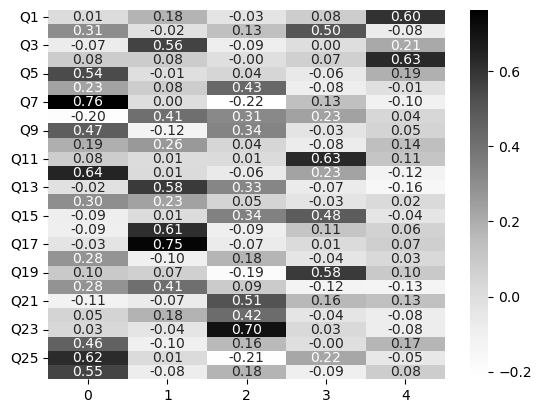

In [18]:
# Your answer here
nerd_efa_5 = FactorAnalyzer(n_factors=5).fit(no_nerdy)

# Loadings
nerd_efa_5_loadings = pd.DataFrame(nerd_efa_5.loadings_, 
                                   index=no_nerdy.columns)

# Show
sns.heatmap(nerd_efa_5_loadings, cmap='Greys', annot=True, fmt='.2f')

There is a some evidence of a clearer pattern here - check the explained variance!

In [19]:
# Your answer here
nerd_efa_5.get_factor_variance()

(array([2.94564003, 2.16992506, 1.83222901, 1.48538128, 1.03485483]),
 array([0.11329385, 0.08345866, 0.07047035, 0.05713005, 0.03980211]),
 array([0.11329385, 0.1967525 , 0.26722285, 0.3243529 , 0.36415501]))

Its not far stronger, but it does show a mild improvement - finally, check the communalities.

In [20]:
# Your answer here
nerd_efa_5.get_communalities()

array([0.40237144, 0.37008014, 0.37003355, 0.41325162, 0.3282594 ,
       0.25575626, 0.6595952 , 0.35995927, 0.35441523, 0.13336557,
       0.41267179, 0.48688008, 0.47408185, 0.1495102 , 0.35756844,
       0.41037199, 0.56767258, 0.12039242, 0.39628197, 0.2844804 ,
       0.32080873, 0.21858848, 0.50649838, 0.27521572, 0.48077126,
       0.35914825])

These are, sadly, lower - the price of fewer factors is less of a clear association between the factors and the questions. At this stage, we might question whether the scale itself is doing what we want. A conclusion a circumspect psychometrician might have here is that the scale is too diluted to be measuring one thing - or, to expand the definition of nerdiness to be multidimensional. Looking over both the 5 and 9 factor solutions, and the questions, can you find a theme in the questions and their associated factor loadings? This is one of the real challenges of factor analysis - outside of the factors, variances, and values - does it seem to make sense?